In [2]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# import dataframes
path = r'...'
orders_product_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_product_all.pkl'))

In [4]:
pd.set_option('display.max_columns', None)
orders_product_all.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order,spending_flag,days_since_prior_order_median,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,region,orders_count,low_activity
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,5.813559,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,south,59,NaN
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,5.813559,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,south,59,NaN
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,5.813559,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,south,59,NaN
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,5.813559,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,south,59,NaN
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,5.813559,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,south,59,NaN


In [5]:
# create profiling variables
# single adult
orders_product_all.loc[(orders_product_all['age'] >= 18) & (orders_product_all['marital_status'] != 'married'), 'characteristic_family'] = 'single adult'

In [6]:
# married adult
orders_product_all.loc[(orders_product_all['age'] >= 18) & (orders_product_all['marital_status'] == 'married'), 'characteristic_family'] = 'married adult'

In [7]:
# young parent
orders_product_all.loc[(orders_product_all['age'] < 18) & (orders_product_all['n_dependants'] > 1), 'characteristic_family'] = 'young parent'

In [8]:
# 'normal' parent
orders_product_all.loc[(orders_product_all['age'] > 18) & (orders_product_all['n_dependants'] > 1), 'characteristic_family'] = 'parent'

In [9]:
# kid
orders_product_all.loc[orders_product_all['age'] < 18, 'characteristic_family'] = 'kid'

In [10]:
# night owl (after 9 PM)
orders_product_all.loc[orders_product_all['order_hour_of_day'] >= 21, 'characteristic_time'] = 'night owl'

In [11]:
# early bird (after 7 AM)
orders_product_all.loc[orders_product_all['order_hour_of_day'] <= 7, 'characteristic_time'] = 'early bird'

In [12]:
# 'normal' time
orders_product_all.loc[(orders_product_all['order_hour_of_day'] > 7) & (orders_product_all['order_hour_of_day'] < 21), 'characteristic_time'] = 'normal'

In [13]:
# orders during the week
orders_product_all.loc[orders_product_all['order_day_of_week'].isin([1, 2, 3, 4, 5]), 'characteristic_day'] = 'during the week'

In [14]:
# orders during the weekend
orders_product_all.loc[orders_product_all['order_day_of_week'].isin([6, 0]), 'characteristic_day'] = 'during the weekend'

In [15]:
pd.set_option('display.max_columns', None)
orders_product_all.head()

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order,spending_flag,days_since_prior_order_median,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,region,orders_count,low_activity,characteristic_family,characteristic_time,characteristic_day
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,5.813559,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,south,59,NaN,parent,normal,during the week
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,5.813559,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,south,59,NaN,parent,early bird,during the week
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,5.813559,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,south,59,NaN,parent,normal,during the week
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,5.813559,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,south,59,NaN,parent,early bird,during the week
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,5.813559,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,south,59,NaN,parent,normal,during the week


<AxesSubplot:>

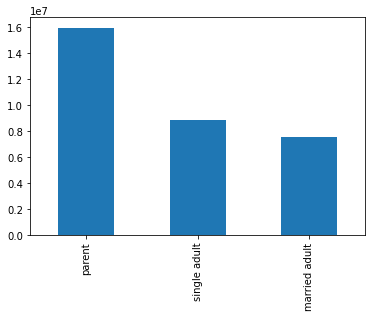

In [16]:
orders_product_all['characteristic_family'].value_counts().plot.bar()

<AxesSubplot:>

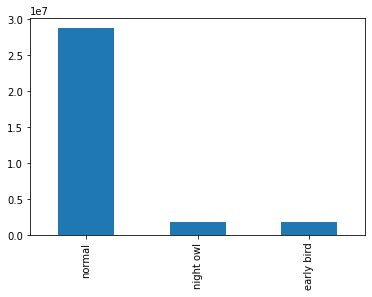

In [17]:
orders_product_all['characteristic_time'].value_counts().plot.bar()

<AxesSubplot:>

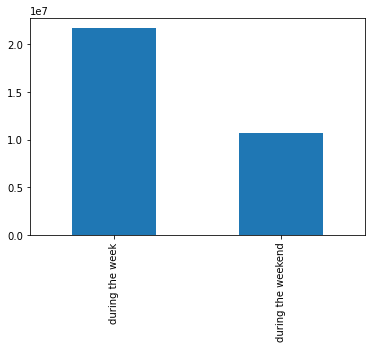

In [18]:
orders_product_all['characteristic_day'].value_counts().plot.bar()

In [19]:
# frequency of characteristic_family
orders_product_all['characteristic_family'].value_counts(dropna = False)

parent           15977545
single adult      8874180
married adult     7550250
Name: characteristic_family, dtype: int64

In [20]:
# frequency of characteristic_time
orders_product_all['characteristic_time'].value_counts(dropna = False)

normal        28792271
night owl      1831997
early bird     1777707
Name: characteristic_time, dtype: int64

In [21]:
# frequency of characteristic_day
orders_product_all['characteristic_day'].value_counts(dropna = False)

during the week       21702089
during the weekend    10699886
Name: characteristic_day, dtype: int64

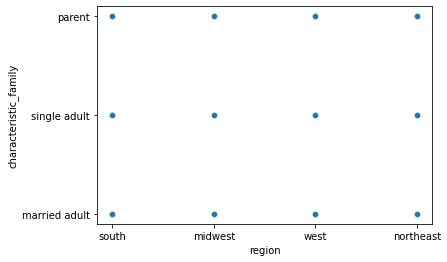

In [22]:
# comparing the characteristics in different regions
# family
scatterplot_income = sns.scatterplot(x = 'region', y = 'characteristic_family', data = orders_product_all)

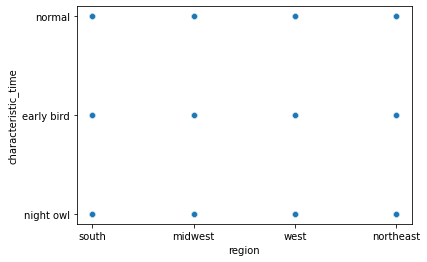

In [23]:
# time
scatterplot_income = sns.scatterplot(x = 'region', y = 'characteristic_time', data = orders_product_all)

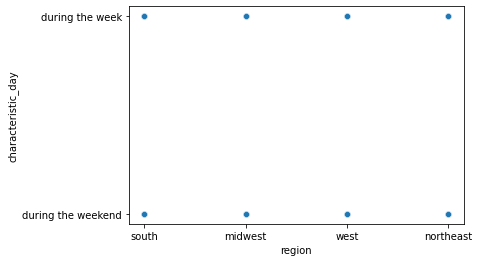

In [24]:
# day
scatterplot_income = sns.scatterplot(x = 'region', y = 'characteristic_day', data = orders_product_all)

In [25]:
# create a crosstab
crosstab = pd.crosstab(orders_product_all['days_since_prior_order'], orders_product_all['order_number'], dropna = False)

In [26]:
crosstab.to_clipboard()

In [27]:
# export to pkl
orders_product_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_product_all_final.pkl'))